In [114]:
# 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #type: ignore
import keras

from tensorflow.keras.datasets import mnist   #type: ignore
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout  #type: ignore
from tensorflow.keras.models import Sequential #type: ignore

Preprocessing and getting the data

In [115]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [116]:
def plot_input_image(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')  # Turn off the axis
    plt.show()

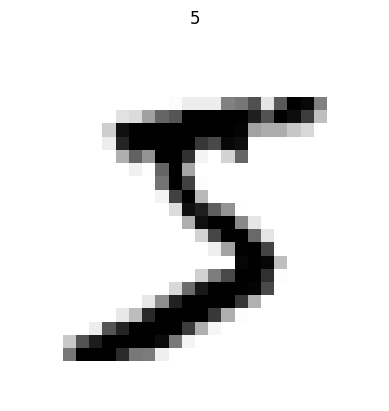

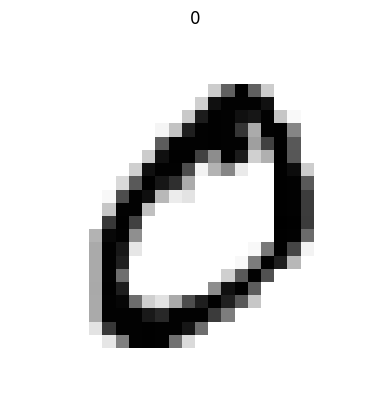

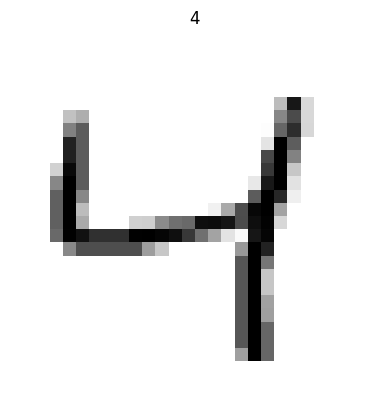

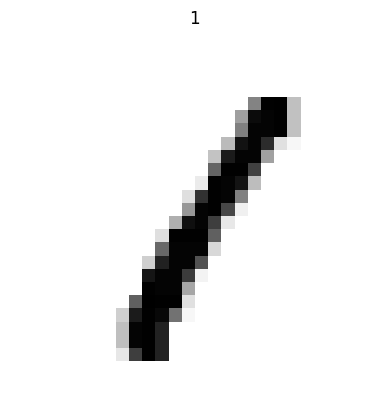

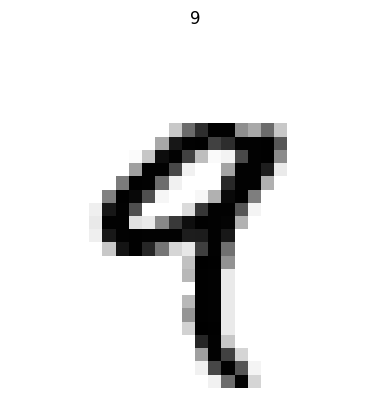

In [117]:
for i in range (5):
    plot_input_image(i)

## Preprocessing the data


In [118]:
# Data Normalization

#Normalizing the image in range [0,1]
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

# Expanding the dimensions of the images to (28, 28,1)
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)



# Converting classes to One hot vectors

y_train=keras.utils.to_categorical(y_train)

y_test=keras.utils.to_categorical(y_test)

In [119]:
X_train.shape

(60000, 28, 28, 1)

In [120]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))



In [121]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1600)             

In [122]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [123]:
# Call backs

from keras. callbacks import EarlyStopping, ModelCheckpoint

# Early stopping

es=EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=4,verbose=1)

mc=ModelCheckpoint("./bestmodel.h5",monitor="val_accuracy",verbose=1,save_best_only=True)

cb=[es,mc]




In [124]:
his=model.fit(X_train,y_train,epochs=5, validation_split=0.3)

Epoch 1/5


1313/1313 [==============================] - 18s 13ms/step - loss: 0.2195 - accuracy: 0.9334 - val_loss: 0.0796 - val_accuracy: 0.9753
Epoch 2/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.0545 - val_accuracy: 0.9830
Epoch 3/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0545 - accuracy: 0.9828 - val_loss: 0.0478 - val_accuracy: 0.9860
Epoch 4/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 5/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0398 - val_accuracy: 0.9876


In [125]:
# model_S=keras.models.load_model("E://python_project//HAND_WRITTEN_DIGIT_RECOGNISATION_PROJECT//bestmodel.h5")
